# Preprocessing WC Data

In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import emoji
from wordcloud import WordCloud, STOPWORDS

from datetime import date, time

In [ ]:
# read Data
df = pd.read_csv('path to data')

# remove duplicates
df = df.sort_values('created_at').drop_duplicates(subset=['full_text'], keep='last')

# split the `created_at` column into date and time to make aggreation over days possible 
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = [d.date() for d in df['created_at']]
df['time'] = [d.time() for d in df['created_at']]
df.drop(['created_at'], 1, inplace=True)

# reset index
df.reset_index(inplace=True, drop=True)

# remove new line from full_text
df.full_text = df.full_text.replace(r'\n','', regex=True)

# make a column that contains the used Hashtags
list_hashtag = []
for x in range(len(df)):
    hashtags_ = re.findall(r"#(\w+)", df['full_text'][x])
    list_hashtag.append(hashtags_)
df['used_hashtags'] = list_hashtag
    
# find linked persons
list_linkedPersons = []
for x in range(len(df)):
    linkedPersons_ = re.findall(r"@(\w+)", df['full_text'][x])
    list_linkedPersons.append(linkedPersons_)
df['linked_Persons'] = list_linkedPersons

# extract day of the challenge
list_days = []
for x in range(len(df)):
    days_ = re.findall('Day (\d+)', df['full_text'][x])
    list_days.append(days_)
df['days'] = list_days

# for WordCloud
# df = df[['user_id', 'user_name', 'full_text']]

df.to_csv('Tweets_wc.csv', index=False)

In [7]:
df = pd.read_csv('/Users/markusmuller/python/projects/66DaysofData-tweets/data/final/Tweets_wc.csv')

In [8]:
df

,tweet_id,user_id,user_name,full_text,retweets,favorite,date,time,used_hashtags,linked_Persons,days
0,1299601482749181952,1292469347370360839,DuckPython,@KenJee_DS looking forward to #66DaysOfData,0,1,2020-08-29,06:55:13,['66DaysOfData'],['KenJee_DS'],[]
1,1299734773456203777,1159830350102781953,KenJee_DS,Very excited to announce the #66daysofdata ini...,51,269,2020-08-29,15:44:52,['66daysofdata'],[],[]
2,1299735515923505153,719854244,Sachin_g_here,@KenJee_DS Looking fwd to #66Daysofdata,0,1,2020-08-29,15:47:49,['66Daysofdata'],['KenJee_DS'],[]
3,1299735809004769282,1001046433695285249,gautham53814486,Let’s start #66daysofdata https://t.co/IPm1WhHaHB,0,2,2020-08-29,15:48:59,['66daysofdata'],[],[]
4,1299736210575769605,1652520728,khudiamayankino,@KenJee_DS count me in #66daysofdata,0,1,2020-08-29,15:50:35,['66daysofdata'],['KenJee_DS'],[]
...,...,...,...,...,...,...,...,...,...,...,...
14695,1381306986067750918,731856877139558400,ABYA80,R2: #66daysofdata with @KenJee_DS Day 27: Had ...,1,14,2021-04-11,18:03:43,"['66daysofdata', 'Python']","['KenJee_DS', 'neuralink']",['27']
14696,1381326847527550983,324583975,georgekanellos,Days 16-18(R2) of #66daysofdata by @KenJee_DSF...,0,1,2021-04-11,19:22:38,['66daysofdata'],['KenJee_DSFound'],[]
14697,1381336589641646083,1300492664308146176,MarkusM99098101,Day 40 of #66DaysOfData r2:read the first sec...,0,5,2021-04-11,20:01:21,['66DaysOfData'],[],['40']
14698,1381338886241157124,1282311789464760321,HeqiqetEhmedova,Day 4 of #100DaysOfCode ; #66daysofdata ✔️D...,10,5,2021-04-11,20:10:29,"['100DaysOfCode', '66daysofdata', 'hackerrank']",[],['4']


## Wordcloud for each participant

In [12]:
df_ken = df[df['user_name']=='KenJee_DS']
df_ken.reset_index(inplace=True)
df_ken['full_text']

0      Very excited to announce the #66daysofdata ini...
1      Exciting news for #66DaysOfData! By popular de...
2      I woke up this morning to see the #66DaysOfDat...
3      Day 1 of #66DaysOfData! To keep it beginner fr...
4      Had a successful day one! of #66daysofdata Som...
                             ...                        
161    Day 63 of the #66DaysOfData R2! Spent most of ...
162    Day 64 of the #66DaysOfData Round 2! Went into...
163    Day 65 of the #66DaysOfData Round 2! Only one ...
164    A little giveaway to honor my 66th day of the ...
165    Day 66 of the #66DaysOfData Round 2! Really en...
Name: full_text, Length: 166, dtype: object

In [14]:
# code from: https://stackoverflow.com/questions/31866304/convert-a-column-in-pandas-to-one-long-string-python-3
Ken_str = ' '.join(df_ken['full_text'].tolist())
Ken_str = Ken_str.lower()

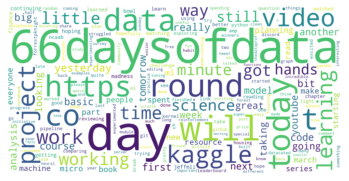

In [15]:
wordcloud = WordCloud(width=1200, height=600, background_color="white", collocations=False, scale=1.8).generate(Ken_str)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Above is the wordcloud on the whole tweets, this is not very informative since there are a lot of information that shouldn't be there like https or 66daysofdata
- remove the hashtags
- remove links
- remove stop words


### Remove Links

In [ ]:
# test_str = "this is a test https://t.co/2T7xxxx and https://t.co/2T7vmcb, does is work?"
# test_str = "this is a test https://t.co/2T7xxxx"
# test_str = "here is no link"
test_str = "https://t.co/2T7xxxx and https://t.co/2T7vmcb and https://t.co https://t.cowefwe"

In [ ]:
link_re = re.compile('http://\S+|https://\S+')
links = re.findall(link_re, test_str)

In [ ]:
 links

In [ ]:
if (len(links) == 0):
    pass
elif (len(links) == 1):
    print(test_str.replace(links[0], ' '))
elif (len(links) == 2):
    print(test_str.replace(links[0], '').replace(links[1], ''))
elif (len(links) == 3):
    print(test_str.replace(links[0], '').replace(links[1], '').replace(links[12], ''))
elif(len(links) > 3):
    print('error: more links')

In [16]:
# remove links
# 
link_re = re.compile('http://\S+|https://\S+')
str_ken = ''

for x in range(len(df_ken)):
    str_ = df_ken['full_text'][x]
    links_ = re.findall(link_re, str_)
    
   
    if (len(links_) == 1):
        str_ = str_.replace(links_[0], ' ')
    elif (len(links_) == 2):
        str_ = str_.replace(links_[0], '').replace(links_[1], '')
    elif (len(links_) == 3):
        str_ = str_.replace(links_[0], '').replace(links_[1], '').replace(links_[2], '')
    elif (len(links_) == 0):
        pass
        
    str_ken += ''.join(str_)

### Remove hashtags

In [17]:
hashtag_re = re.compile('#(\w+)')
str_ken = re.sub(hashtag_re, '', str_ken)

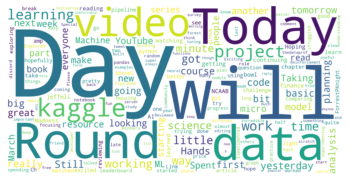

In [18]:
wordcloud = WordCloud(width=1200, height=600, background_color="white", collocations=False, scale=1.8).generate(str_ken)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Tokenize, remove non alphabetic tokens and remove stop words
- there a a few words that are in almost every tweet like 'day' or 'today' so thy don't provide any value within the wordcloud
    - 'day', 'today', 'will', 'round'

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
# first we need to download data from nltk
nltk.download('stopwords')
# or we can use the command line
# !python -m nltk.downloader all

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markusmuller/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# tokenize string
tokens = word_tokenize(str_ken)
print(tokens[:100])

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/markusmuller/nltk_data'
    - '/Users/markusmuller/miniforge3/nltk_data'
    - '/Users/markusmuller/miniforge3/share/nltk_data'
    - '/Users/markusmuller/miniforge3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
# we can remove every token which is not alphabetic 
words = [word for word in tokens if word.isalpha()]
print(words[:100])


In [ ]:
# filter out stop words from NLTK
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

In [ ]:
# join tokens to a string
str_ken = ''
for w in words:
    word = w.lower()
    str_ken += "".join(word)+ " "

In [ ]:
wordcloud = WordCloud(width=1200, height=600, background_color="white", collocations=False, scale=1.8).generate(str_ken)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# more words to remove
list_remove = ['round', 'today', 'yesterday', 'day', 'r2', 'amp']
tokens = word_tokenize(str_ken)
words = [w for w in tokens if not w in list_remove]

str_ken = ''
for w in words:
    word_ = w
    str_ken += "".join(word_)+ " "

In [ ]:
wordcloud = WordCloud(width=1200, height=600, background_color="white", collocations=True, scale=1.8).generate(str_ken)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('wc_newstop.png')

### Test WordNet Lemmatizer

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
tokens = word_tokenize(str_ken)

In [ ]:
str_ken = ''
for word in tokens:
    word_ = wordnet_lemmatizer.lemmatize(word, pos="v")
    str_ken += "".join(word_)+ " "

In [ ]:
wordcloud = WordCloud(width=1200, height=600, background_color="white", collocations=True, scale=1.8).generate(str_ken)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Resources
- https://machinelearningmastery.com/clean-text-machine-learning-python/